In [1]:
import quandl
quandl.ApiConfig.api_key = "KxKMd8dsHx1sWnaGj6_U"
import numpy as np
import matplotlib as plt
import pandas as pd
import keras
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [2]:
def get_monthly_close_prices_ticker(ticker,start_date,end_date):
    
    df = quandl.get_table('SHARADAR/SEP',ticker=ticker,date={'gte':start_date,'lte':end_date}, qopts={'columns':['ticker','date','close']},paginate=True).fillna(value=0)
    close = df.pivot(index='date', columns='ticker', values='close')
    monthly = close.resample('M').apply(lambda x: x[-1])
    #.agg(lambda x: x[-1])
    return monthly

In [3]:
monthly_prices = get_monthly_close_prices_ticker('A','2009-13-31','2019-01-01')

In [4]:
#monthly_prices

In [5]:
#quandl.get_table('SHARADAR/SEP',date={'gte':'2018-06-30','lte':'2019-01-01'}, qopts={'columns':['ticker','date','close']},paginate=True).fillna(value=0)

In [6]:
def get_monthly_returns(monthly_prices):
    """
    Compute returns for each ticker and date in close.
    
    Parameters
    ----------
    close : DataFrame
        Close prices for each ticker and date
    
    Returns
    -------
    returns : DataFrame
        Returns for each ticker and date
    """
        

    #.agg(lambda x: x[-1])
    monthly_returns = (monthly_prices - monthly_prices.shift(1))/monthly_prices.shift(1).fillna(value=0)
    
    
    return monthly_returns

In [7]:
df1 = get_monthly_returns(monthly_prices)


In [8]:
df1.head()

ticker,A
date,
2010-01-31,NaN
2010-02-28,0.122369
2010-03-31,0.093134
2010-04-30,0.054376
2010-05-31,-0.107557


In [9]:
df1 = df1.iloc[ 1: , : ]

In [10]:
df1.reset_index(inplace=True)


In [11]:
df1.head()

ticker,date,A
0,2010-02-28,0.122369
1,2010-03-31,0.093134
2,2010-04-30,0.054376
3,2010-05-31,-0.107557
4,2010-06-30,-0.121446


In [12]:
def get_factor_data_ticker(ticker,start_date,end_date):
    
    df = quandl.get_table('SHARADAR/SF1',ticker=ticker,dimension='ARQ',calendardate={'gte':start_date, 'lte':end_date}, paginate=True).fillna(value=0)

    
    return df

In [13]:
df2 = get_factor_data_ticker('A','2009-13-31','2019-01-01')

In [14]:
df2.shape

(36, 111)

In [15]:
df2['calendardate'] = pd.to_datetime(df2['calendardate']).dt.strftime("%Y-%m-%d")


In [16]:
def add_returns(row, df):
    c_date = row['calendardate']
    ticker = row['ticker']
    result = 0.0
    value = df.loc[df['date'] == c_date]
    if not value.empty:
        if ticker in value.columns:
            result = value[ticker].values[0]
    return result
df2['results'] = df2.apply(lambda row: add_returns(row, df1), axis=1)

In [17]:
df2.sort_values('calendardate')

,ticker,dimension,calendardate,datekey,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital,results
None,,,,,,,,,,,,,,,,,,,,,
35,A,ARQ,2010-03-31,2010-06-07,2010-04-30,2019-05-30,-239000000,7767000000,0,5712000000,...,348000000,354000000,3.652,6997000000,0,31000000,0,20.106,3003000000,0.093134
34,A,ARQ,2010-06-30,2010-09-07,2010-07-31,2019-05-30,-225000000,9100000000,0,5735000000,...,347000000,352000000,3.988,7188000000,0,22000000,0,20.715,2818000000,-0.121446
33,A,ARQ,2010-09-30,2010-12-20,2010-10-31,2019-05-30,-88000000,9696000000,0,6169000000,...,344000000,356000000,4.581,7746000000,0,-49000000,0,22.517,3086000000,0.237301
32,A,ARQ,2010-12-31,2011-03-09,2011-01-31,2019-05-30,-63000000,8044000000,0,4598000000,...,347000000,355000000,4.378,6129000000,0,5000000,0,17.663,3192000000,0.183038
31,A,ARQ,2011-03-31,2011-06-07,2011-04-30,2019-05-30,278000000,8649000000,0,5096000000,...,347000000,355000000,4.833,6601000000,0,60000000,0,19.023,3504000000,0.064163
30,A,ARQ,2011-06-30,2011-09-07,2011-07-31,2019-05-30,271000000,8753000000,0,5223000000,...,348000000,357000000,4.859,6711000000,0,-49000000,0,19.284,3718000000,0.024865
29,A,ARQ,2011-09-30,2011-12-16,2011-10-31,2019-05-30,116000000,9057000000,0,5569000000,...,347000000,355000000,4.980,7061000000,0,4000000,0,20.349,3732000000,-0.152427
28,A,ARQ,2011-12-31,2012-03-05,2012-01-31,2019-05-30,87000000,9099000000,0,5715000000,...,348000000,352000000,4.698,7087000000,0,26000000,0,20.365,4010000000,-0.068533
27,A,ARQ,2012-03-31,2012-06-04,2012-04-30,2019-05-30,68000000,9413000000,0,6010000000,...,348000000,354000000,4.980,7422000000,0,38000000,0,21.328,4175000000,0.020403


In [18]:
corr_matrix = df2.corr().abs()

In [19]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [20]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [21]:
df2 = df2.drop(df2[to_drop], axis=1)

In [22]:
df2.shape

(36, 72)

In [23]:
dataset = df2.set_index('calendardate')




In [24]:
df_numbers = dataset.drop(columns=['ticker','dimension','reportperiod','lastupdated','datekey'])

In [25]:
df_numbers = df_numbers.sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True, by=None)

In [26]:
pd.options.display.max_columns = None
display(df_numbers)

,accoci,assets,assetsavg,assetsc,assetsnc,assetturnover,bvps,capex,cashneq,cor,consolinc,currentratio,de,debt,debtc,debtnc,depamor,deposits,divyield,dps,ebit,ebitdamargin,equityavg,ev,evebit,evebitda,fcf,fxusd,grossmargin,intexp,invcapavg,investments,investmentsc,liabilities,liabilitiesc,liabilitiesnc,ncf,ncfbus,ncfcommon,ncfdebt,ncfdiv,ncff,ncfi,ncfinv,ncfx,netincdis,netincnci,opinc,payables,pb,pe,prefdivis,ps,retearn,roa,roe,roic,ros,sbcomp,sharefactor,sharesbas,taxassets,taxexp,taxliabilities,workingcapital,results
calendardate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-03-31,-239000000,7767000000,0,5712000000,2055000000,0,7.540,-28000000,4209000000,560000000,108000000,2.109,1.957,2894000000,1501000000,1393000000,36000000,0,0.000,0.000,161000000,0.155,0,9161693501,26,18.214,197000000,1.0,0.559,22000000,0,169000000,11000000,5135000000,2709000000,2426000000,2000000,20000000,-44000000,-15000000,0,-59000000,-2000000,4000000,1000000,0,0,154000000,362000000,3.993,54.283,0,2.225,2947000000,0,0,0,0,13000000,1.0,348062907,0,31000000,0,3003000000,0.093134
2010-06-30,-225000000,9100000000,0,5735000000,3365000000,0,8.075,-27000000,3879000000,659000000,205000000,1.966,2.245,3678000000,1501000000,2177000000,60000000,0,0.000,0.000,251000000,0.225,0,9840276476,16,12.409,63000000,1.0,0.524,24000000,0,136000000,0,6290000000,2917000000,3373000000,1000000,-1102000000,-54000000,728000000,0,674000000,-1098000000,30000000,5000000,0,0,115000000,459000000,3.584,24.080,0,1.994,3152000000,0,0,0,0,13000000,1.0,346370351,0,22000000,0,2818000000,-0.121446
2010-09-30,-88000000,9696000000,0,6169000000,3527000000,0,9.384,-34000000,4205000000,742000000,292000000,2.001,2.001,3691000000,1501000000,2190000000,67000000,0,0.000,0.000,270000000,0.214,0,13609158727,17,13.747,339000000,1.0,0.529,27000000,0,142000000,0,6460000000,3083000000,3377000000,165000000,-14000000,-17000000,0,0,-17000000,-43000000,10000000,19000000,0,0,203000000,499000000,4.375,20.648,0,2.594,3444000000,0,0,0,0,15000000,1.0,347604202,0,-49000000,0,3086000000,0.237301
2010-12-31,-63000000,8044000000,0,4598000000,3446000000,0,9.602,-38000000,2655000000,703000000,193000000,3.270,1.412,2139000000,1000000,2138000000,63000000,0,0.000,0.000,221000000,0.187,0,15376875468,17,13.620,82000000,1.0,0.537,23000000,0,134000000,0,4705000000,1406000000,3299000000,1533000000,0,-134000000,-1500000000,0,-1634000000,1500000000,5000000,3000000,0,0,211000000,444000000,4.770,19.916,0,2.764,3637000000,0,0,0,0,28000000,1.0,345122160,0,5000000,0,3192000000,0.183038
2011-03-31,278000000,8649000000,0,5096000000,3553000000,0,11.392,-51000000,2975000000,777000000,200000000,3.201,1.186,2144000000,0,2144000000,64000000,0,0.000,0.000,280000000,0.205,0,15770753321,15,12.360,327000000,1.0,0.537,20000000,0,123000000,0,4688000000,1592000000,3096000000,12000000,-96000000,68000000,0,0,68000000,-126000000,9000000,17000000,0,0,266000000,486000000,4.200,18.654,0,2.697,3837000000,0,0,0,0,16000000,1.0,348045143,0,60000000,0,3504000000,0.064163
2011-06-30,271000000,8753000000,0,5223000000,3530000000,0,12.046,-32000000,3101000000,799000000,330000000,3.470,1.086,2168000000,0,2168000000,63000000,0,0.000,0.000,301000000,0.215,0,11459079652,11,8.622,220000000,1.0,0.527,20000000,0,122000000,0,4553000000,1505000000,3048000000,0,0,-97000000,0,0,-97000000,-32000000,0,3000000,0,0,281000000,470000000,2.956,12.209,0,1.917,4167000000,0,0,0,0,14000000,1.0,347214336,0,-49000000,0,3718000000,0.024865
2011-09-30,116000000,9057000000,0,5569000000,3488000000,0,12.415,-49000000,3527000000,807000000,289000000,3.032,1.101,2185000000,253000000,1932000000,63000000,0,0.000,0.000,316000000,0.219,0,10306268289,9,7.517,461000000,1.0,0.533,23000000,0,117000000,0,4741000000,1837000000,2904000000,-667000000,-1000000,-30000000,0,0,-30000000,-48000000,1547000000,-6000000,0,0,313000000,472000000,2.704,11.510,0,1.761,4456000000,0,0,0,0,14000000,1.0,348125173,0,4000000,0,3732000000,-0.152427
2011-12-31,87000000,9099000000,0,5715000000,3384000000

In [27]:
df_numbers.shape

(36, 66)

In [28]:
#df_numbers[:36]

In [29]:
dataset = df_numbers.values
dataset

array([[-2.39000000e+08,  7.76700000e+09,  0.00000000e+00, ...,
         0.00000000e+00,  3.00300000e+09,  9.31341386e-02],
       [-2.25000000e+08,  9.10000000e+09,  0.00000000e+00, ...,
         0.00000000e+00,  2.81800000e+09, -1.21446230e-01],
       [-8.80000000e+07,  9.69600000e+09,  0.00000000e+00, ...,
         0.00000000e+00,  3.08600000e+09,  2.37300704e-01],
       ...,
       [-3.35000000e+08,  8.34900000e+09,  0.00000000e+00, ...,
         0.00000000e+00,  2.65300000e+09, -1.29198966e-03],
       [-4.08000000e+08,  8.54100000e+09,  0.00000000e+00, ...,
         0.00000000e+00,  2.67700000e+09,  4.44181226e-02],
       [-3.81000000e+08,  8.95200000e+09,  0.00000000e+00, ...,
         0.00000000e+00,  2.61700000e+09, -6.75881133e-02]])

In [30]:
#dataset
36 * 0.9

32.4

train = dataset[0:32,:]
valid = dataset[32:,:]


valid.shape

train_data = dataset[:32]
test_data = dataset[32:]

train_targets = train_data[:,-1]

scaler = MinMaxScaler(feature_range=(0, 1))
train_data = scaler.fit_transform(train_data)



In [31]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [32]:
dataset.shape

(36, 66)

In [33]:
dataset.shape

(36, 66)

In [34]:
#(train_data, train_targets), (test_data, test_targets)

train_data = dataset[0:32,:65]
train_targets = dataset[0:32,65:]
test_data = dataset[32:,:65]
test_targets = dataset[32:,65:]




In [35]:
train_data.shape

(32, 65)

In [36]:
#train_data = train_data.reshape(1,32,65)

In [37]:
test_data.shape

(4, 65)

In [38]:
#test_data = test_data.reshape(1,4,65)

In [39]:
test_targets.shape

(4, 1)

In [40]:
#test_targets = test_targets.reshape(1,4,1)

In [41]:
#train_targets

In [42]:
#train_targets = train_targets.reshape(1,32,1)

In [43]:
test_data.shape

(4, 65)

In [44]:
#test_data = test_data.reshape(1,4,65)

In [45]:
train_data.shape

(32, 65)

In [68]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(32, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model


In [69]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [70]:
all_scores

[0.28701460361480713,
 0.19350209832191467,
 0.09816844761371613,
 0.07710204273462296]

In [71]:
np.mean(all_scores)

0.16394679807126522

In [72]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=100, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 61ms/step


In [73]:
test_mae_score

0.1736992597579956

In [63]:
num_epochs = 100
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)
    

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


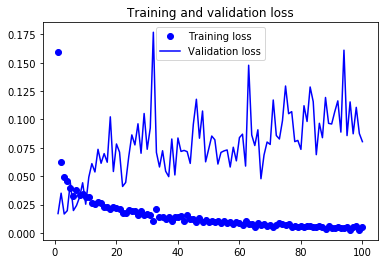

In [64]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [65]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

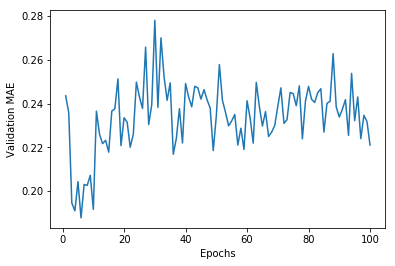

In [66]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

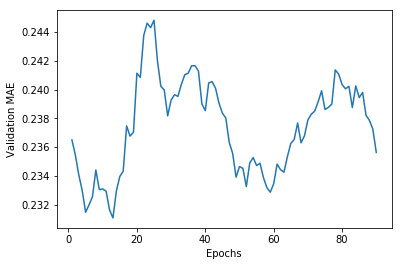

In [67]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [73]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=500, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)


4/4 [==============================] - 0s 36ms/step


In [74]:
test_mae_score

0.1266973316669464

In [75]:
np.mean(np.abs(preds - targets))

NameError: name 'preds' is not defined